# Deformable mesh

varying spatial step across system

forwards and backward moving avection equaiton

$$
\left (\frac{\partial}{\partial t} - c \frac{\partial}{\partial x} \right )\left (\frac{\partial}{\partial t} + c \frac{\partial}{\partial x} \right )\psi = 0
$$

temporal derivative

$$
\frac{\partial^2 \psi^{n}_{i}}{\partial t^2} \approx \frac{\psi^{n+1}_{i} + \psi^{n-1}_{i} - 2\psi^{n}_{i}}{\Delta t^2}
$$

Spatial derivative

$$
\Delta x_{-} \left ( \psi_{i+1} = \psi_{i} + \Delta x_{+} \frac{\partial \psi_{i}}{\partial x} + \frac{\Delta x_{+}^2}{2} \frac{\partial^2 \psi_{i}}{\partial x^2} + \mathcal{O}(\Delta x_{+}^3, \Delta x_{-}^3) \right ) \\
\Delta x_{+} \left ( \psi_{i-1} = \psi_{i} - \Delta x_{-} \frac{\partial \psi_{i}}{\partial x} + \frac{\Delta x_{-}^2}{2} \frac{\partial^2 \psi_{i}}{\partial x^2} + \mathcal{O}(\Delta x_{+}^3, \Delta x_{-}^3) \right )
$$

leading to :

$$
\cfrac{\partial^2 \psi_{i}}{\partial x^{2}} \approx \cfrac{\Delta x_{-}\psi_{i+1} + \Delta x_{+}\psi_{i-1}-\psi_{i}(\Delta x_{+} + \Delta x_{-})}{\cfrac{\Delta x_{+}\Delta x_{-}}{2} (\Delta x_{+}+\Delta x_{-})}
$$

Discritization

$$
u^{n+1}_{i} = c^2\Delta t^2\left (\cfrac{\Delta x_{i-1}u_{i+1}^{n} + \Delta x_{i+1}u_{i-1}^{n}-u_{i}^{n}(\Delta x_{i+1} + \Delta x_{i-1})}{\cfrac{\Delta x_{i+1}\Delta x_{i-1}}{2} (\Delta x_{i+1}+\Delta x_{i-1})} \right ) - u_{i}^{n-1} + 2u_{i}^{n}
$$

## Mesh creation

$$
\Delta x = \Delta x_0 r^{n}
$$
$$
\sum^{ix}_{n} \Delta x_0 r^{n} = L = \Delta x_0 \frac{1-r^{n}}{1-r}
$$

In [1]:
%reset
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Populating the interactive namespace from numpy and matplotlib


In [2]:
xmin = 0
xmax = 10.
ix = 600
tstop = 4.
r = .99

"""
x = np.linspace(xmin, xmax, ix)
dx = np.diff(x)
"""
dx = (xmax-xmin)/2.*(1-r)/(1-r**(ix/2))
x1 = [dx*r**n for n in range(0,(ix)/2)]
x2 = [dx*r**n for n in range(0,(ix)/2)][::-1]
dx = np.append(x1,x2)
x = np.cumsum(dx)


In [3]:
#plt.plot(dx)

In [4]:
node_c = np.ones_like(x)
node_c[ix/2:]=.5

xcen = x #x[:-1] - dx/2.
c = node_c

dt = .1*dx.min()/(c.max())

u = np.zeros_like(dx)
un = np.zeros_like(u)
nu = np.zeros_like(u)

gauss = lambda tp, b: np.exp(-(tp-b)**2/.1)
top_hat = lambda t: 1 if t<1 else 0

"""
nu = gauss(xcen, 1.)
un = gauss(xcen, (1.+c[0]*dt))
"""
print dt
print tstop/dt

0.000260454189506
15357.7871317


(0, 10.0)

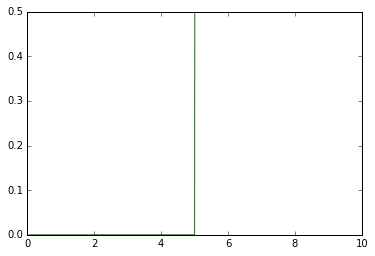

In [5]:
plt.plot(xcen, un)
plt.plot(xcen, nu, "r--")
plt.plot(xcen, 1.-c)
plt.xlim(xmin,xmax)

In [6]:
t = 0 
while t < tstop:
    u[1:-1] = -1*nu[1:-1] + 2*un[1:-1] + 2.*c[1:-1]**2 * dt**2 * ( dx[:-2]*un[2:] + dx[2:]*un[:-2] - un[1:-1]*(dx[2:]+dx[:-2])) / (dx[2:]*dx[:-2]*(dx[2:]+dx[:-2]))
    # u[0] = top_hat(t)
    u[0] = gauss(t, 1.)
    nu = un.copy()
    un = u.copy()
    t += dt
    

(0, 10.0)

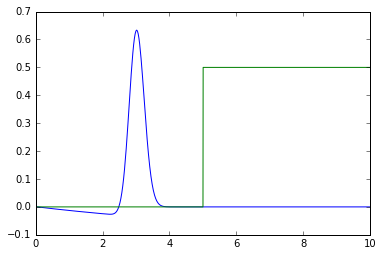

In [7]:
plt.plot(xcen, u)
plt.plot(xcen, 1.-c)
plt.xlim(xmin,xmax)

 > nonphysical reflections encountered in the discretization of wave equations on nonuniform grids. Such nonphysical solutions are commonly attributed to spurious modes in the numerical dispersion relation. http://wwwf.imperial.ac.uk/~sreich/04_2.pdf